In [1]:
import warnings
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from utils.plot_points import plot_points
from utils.plot_regressor import plot_regressor

from sklearn.tree import DecisionTreeRegressor  
from sklearn import tree
from sklearn.metrics import accuracy_score

from sklearn.ensemble import RandomForestRegressor 
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

warnings.filterwarnings('ignore')

# Фиксация случайного seed для воспроизводимости результатов
np.random.seed(0)

# Загрузка и подготовка данных о спаме

In [2]:
# Создание массива данных: [Лотерея, Продажа, Спам (0/1)]
pop_apps = np.array([
    [10, 7], [20, 5], [30, 7], 
    [40, 1], [50, 2], [60, 1], 
    [70, 5], [80, 4]
])

# Создание DataFrame с названиями столбцов
pop_apps = pd.DataFrame(data=pop_apps, columns=["Age", "Days_per_week"])
pop_apps  # Вывод таблицы данных

,Age,Days_per_week
0,10,7
1,20,5
2,30,7
3,40,1
4,50,2
5,60,1
6,70,5
7,80,4


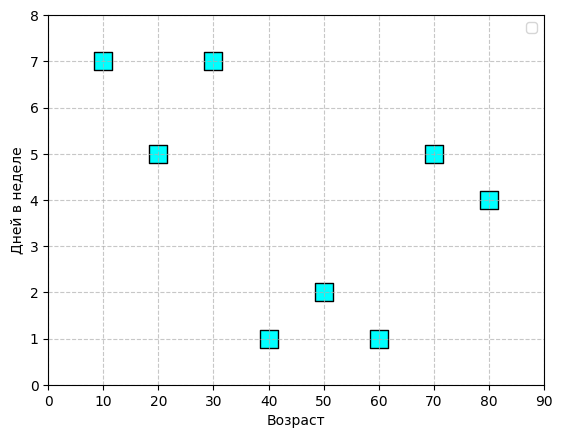

In [3]:
# Разделение на признаки и целевую переменную
features = pop_apps[['Age']]  # Признаки
labels = pop_apps['Days_per_week']  # Метки (целевая переменная)

# Установим параметры для графиков
figsize = (12, 4)
point_size=150
xlabel = 'Возраст'  # Подпись оси X
ylabel = 'Дней в неделе'  # Подпись оси Y
xlim=(0, 90)
ylim=(0, 8)

# Визуализация точек данных
plot_points(features, labels, 
            point_size=point_size,
            xlabel=xlabel,
            ylabel=ylabel,
            xlim=xlim,
            ylim=ylim)
plt.show()

# Обучение одного дерева решений

In [4]:
decision_tree_regressor = DecisionTreeRegressor(random_state=0, max_depth=2)  # Создание регрессии
decision_tree_regressor.fit(features, labels)  # Обучение модели

,criterion,'squared_error'
,splitter,'best'
,max_depth,2
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [5]:
print("Accuracy:", decision_tree_regressor.score(features, labels))  # Оценка точности

Accuracy: 0.9246031746031746


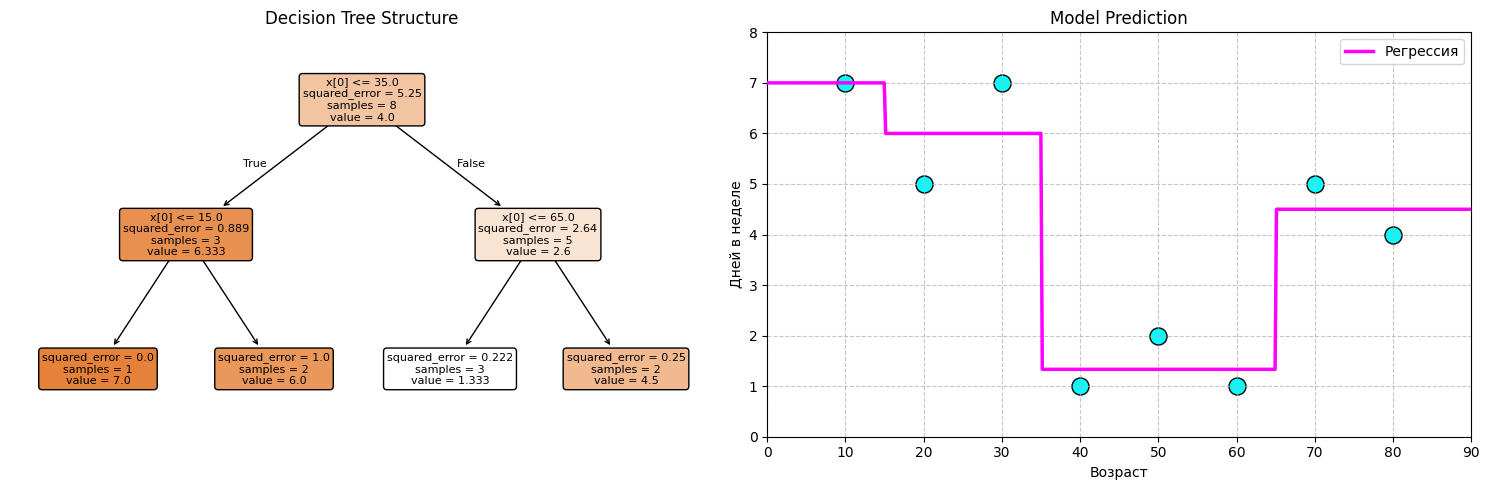

In [6]:
# Создаем фигуру с двумя подграфиками в одной строке
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Визуализация дерева решений (слева)
tree.plot_tree(decision_tree_regressor, rounded=True, filled=True, ax=ax1)
ax1.set_title('Decision Tree Structure')

# График модели (справа)
plot_regressor(features, labels, decision_tree_regressor, 
               point_size=point_size, 
               xlabel=xlabel, 
               ylabel=ylabel, 
               xlim=xlim, 
               ylim=ylim,
               ax=ax2)  # Передаем ось для отрисовки
ax2.set_title('Model Prediction')

plt.tight_layout()  # Автоматическая регулировка отступов
plt.show()

# Обучение Random Forest в Scikit-Learn

In [7]:
random_forest_regressor = RandomForestRegressor(random_state=0, n_estimators=5, max_depth=1)
random_forest_regressor.fit(features, labels)

,n_estimators,5
,criterion,'squared_error'
,max_depth,1
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [8]:
random_forest_regressor.score(features, labels)

0.5028409027102905

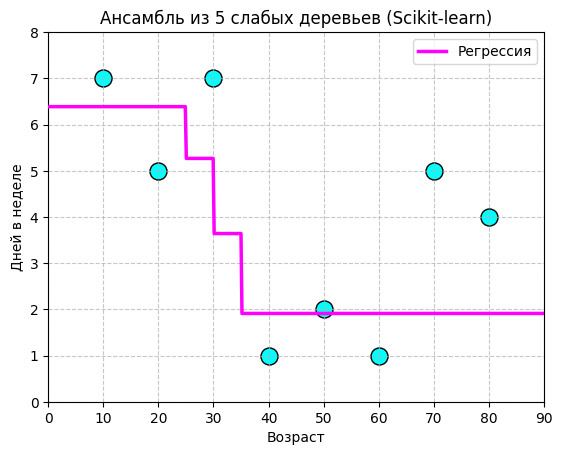

In [9]:
plot_regressor(features, labels, 
               random_forest_regressor, 
               point_size=point_size, 
               xlabel=xlabel, 
               ylabel=ylabel, 
               xlim=xlim, 
               ylim=ylim)
plt.title("Ансамбль из 5 слабых деревьев (Scikit-learn)")
plt.show()

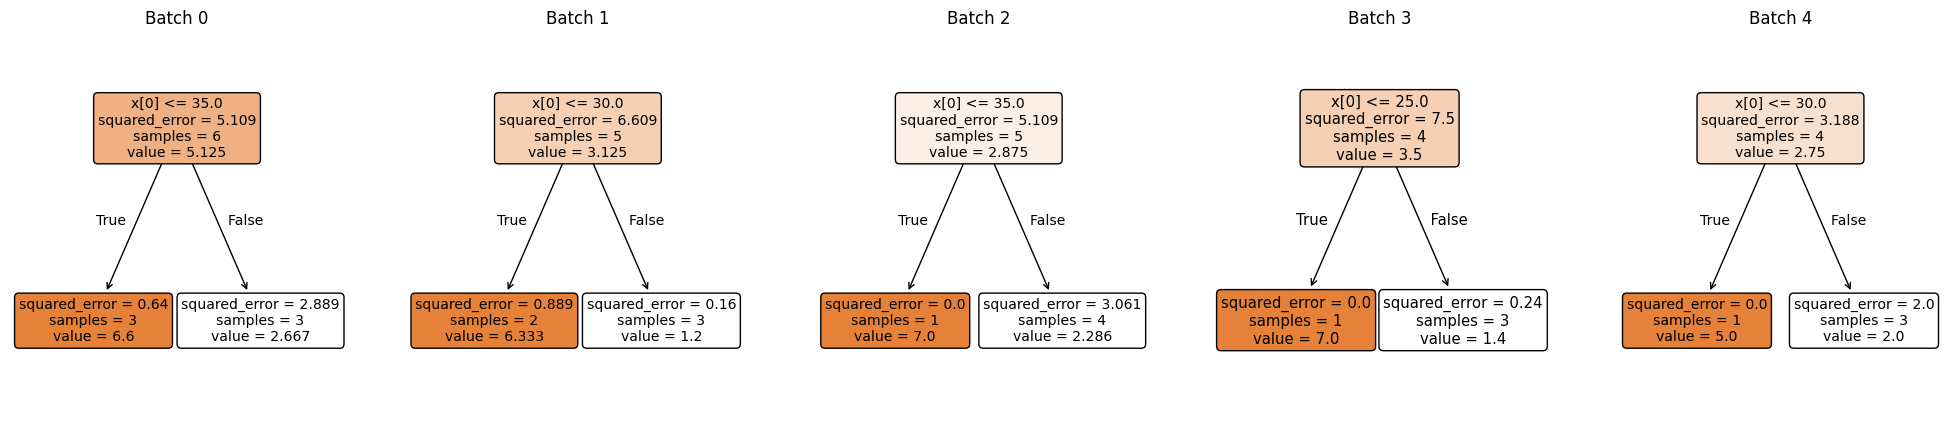

In [10]:
# Создаем фигуру с 3 подграфиками в одной строке
fig, axes = plt.subplots(1, 5, figsize=(25, 5))  # 1 строка, 3 столбца, размер 15x5 дюймов

for i, dt_model in enumerate(random_forest_regressor.estimators_):
    # Визуализация дерева решений
    tree.plot_tree(dt_model, rounded=True, filled=True, ax=axes[i])
    axes[i].set_title(f'Batch {i}')  # Устанавливаем заголовок
    
plt.show()

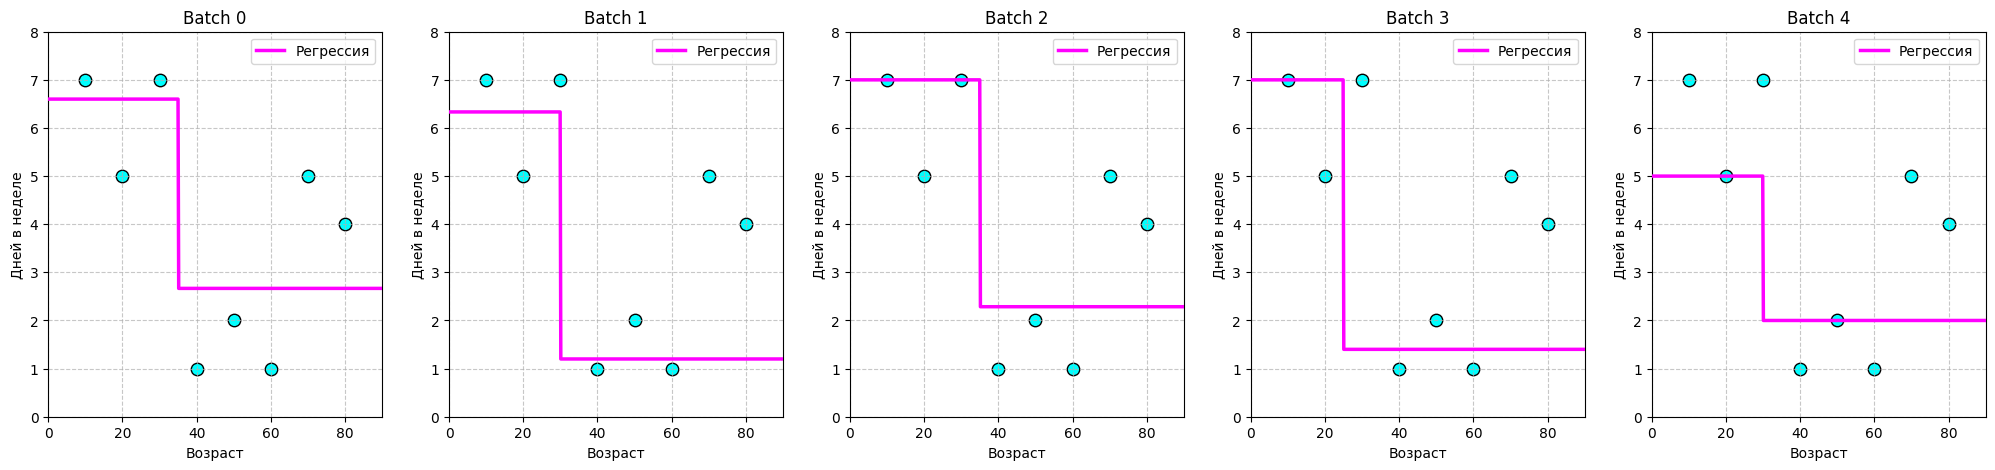

In [11]:
# Создаем фигуру с 3 подграфиками в одной строке
fig, axes = plt.subplots(1, 5, figsize=(25, 5))  # 1 строка, 3 столбца, размер 15x5 дюймов

for i, dt_model in enumerate(random_forest_regressor.estimators_):
    # Визуализация границы решения регрессора
    plot_regressor(features, labels, dt_model, xlabel=xlabel, ylabel=ylabel, xlim=xlim, ylim=ylim, ax=axes[i])
    
    axes[i].set_title(f'Batch {i}')  # Устанавливаем заголовок
    
plt.show()

# AdaBoost. Разумное объединение слабых алгоритмов для формирования сильного

In [12]:
adaboost_regressor = AdaBoostRegressor(random_state=0, n_estimators=6)
adaboost_regressor.fit(features, labels)

,estimator,None
,n_estimators,6
,learning_rate,1.0
,loss,'linear'
,random_state,0


In [13]:
adaboost_regressor.score(features, labels)

0.9523809523809523

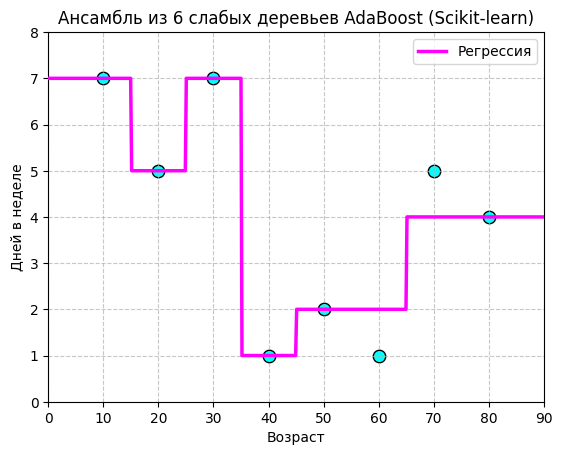

In [14]:
plot_regressor(features, labels, 
                       adaboost_regressor,  
                       xlabel=xlabel, 
                       ylabel=ylabel, 
                       xlim=xlim, 
                       ylim=ylim)
plt.title("Ансамбль из 6 слабых деревьев AdaBoost (Scikit-learn)")
plt.show()

In [15]:
adaboost_regressor.estimator_weights_

array([1.09861229, 1.38855577, 1.64633622, 1.54554507, 1.87923435,
       1.23501451])

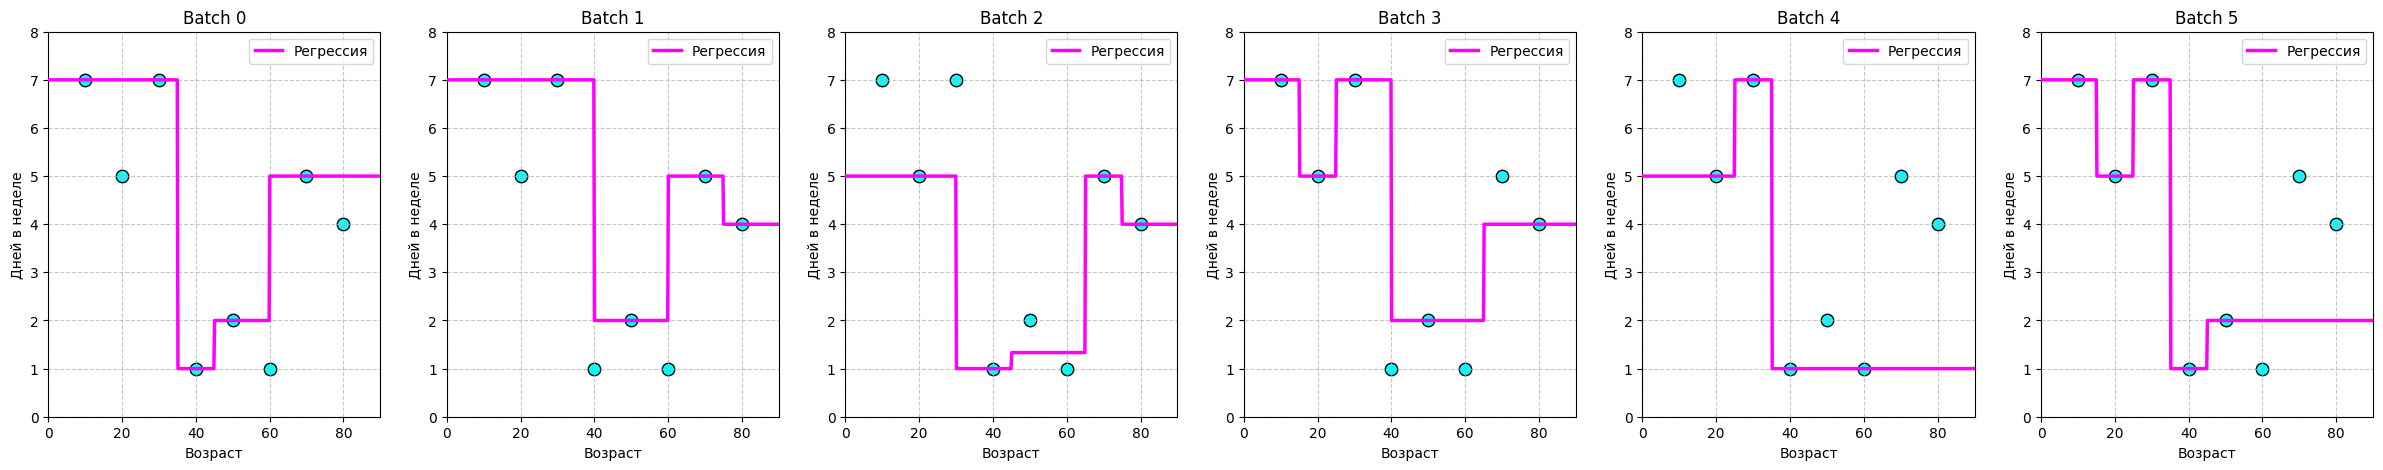

In [16]:
# Создаем фигуру с 3 подграфиками в одной строке
fig, axes = plt.subplots(1, 6, figsize=(30, 5))  # 1 строка, 3 столбца, размер 15x5 дюймов

for i, dt_model in enumerate(adaboost_regressor.estimators_):
    # Визуализация границы решения регрессора
    plot_regressor(features, labels, dt_model, xlabel=xlabel, ylabel=ylabel, xlim=xlim, ylim=ylim, ax=axes[i])
    
    axes[i].set_title(f'Batch {i}')  # Устанавливаем заголовок
    
plt.show()

# Градиентный бустинг. Использование деревьев решений для формирования сильных обучающих алгоритмов

In [17]:
gradient_boosting_regressor = GradientBoostingRegressor(random_state=0, n_estimators=4, max_depth=2, learning_rate=0.8)
gradient_boosting_regressor.fit(features, labels)

,loss,'squared_error'
,learning_rate,0.8
,n_estimators,4
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,2
,min_impurity_decrease,0.0
,init,None


In [18]:
gradient_boosting_regressor.score(features, labels)

0.9802910476190476

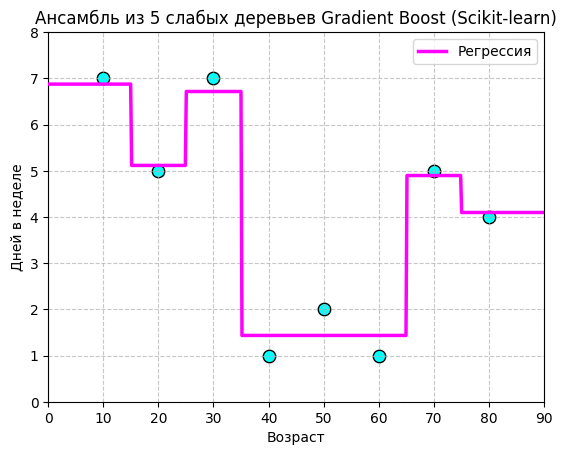

In [19]:
plot_regressor(features, labels, 
                       gradient_boosting_regressor, 
                       xlabel=xlabel, 
                       ylabel=ylabel, 
                       xlim=xlim, 
                       ylim=ylim)
plt.title("Ансамбль из 5 слабых деревьев Gradient Boost (Scikit-learn)")
plt.show()

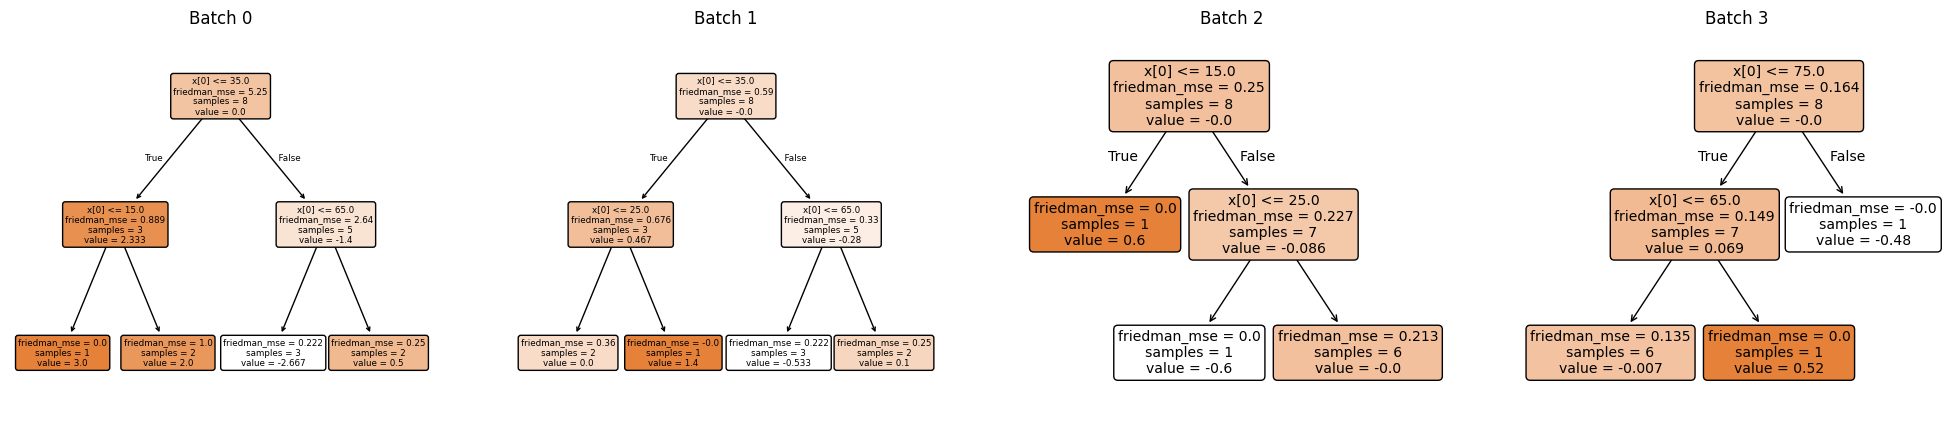

In [20]:
# Создаем фигуру с 5 подграфиками в одной строке
fig, axes = plt.subplots(1, 4, figsize=(25, 5))  # 1 строка, 5 столбцов, размер 35x5 дюймов

for i, dt_model in enumerate(gradient_boosting_regressor.estimators_):
    # Визуализация дерева решений
    tree.plot_tree(dt_model[0], rounded=True, filled=True, ax=axes[i])
    axes[i].set_title(f'Batch {i}')  # Устанавливаем заголовок
    
plt.show()

# XGBoost — экстремальный метод градиентного бустинга

In [21]:
xgboost_regressor = XGBRegressor(random_state=0, 
                                 n_estimators=3, 
                                 max_depth=2, 
                                 reg_lambda=0, 
                                 min_split_loss=1, 
                                 learning_rate=0.7)
xgboost_regressor.fit(np.array(features), labels)

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [22]:
xgboost_regressor.score(np.array(features), labels)

0.9013694524765015

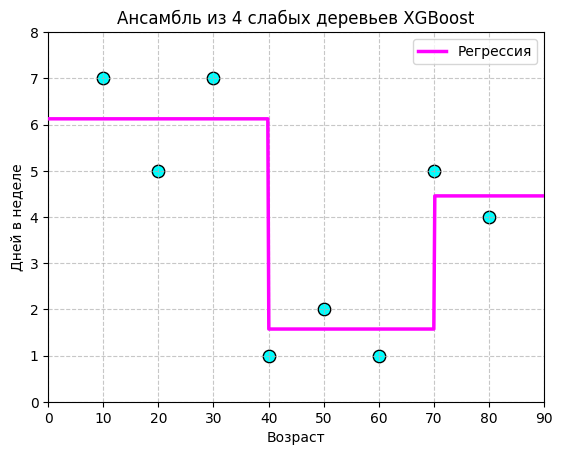

In [23]:
plot_regressor(features, labels, 
                       xgboost_regressor, 
                       xlabel=xlabel, 
                       ylabel=ylabel, 
                       xlim=xlim, 
                       ylim=ylim)
plt.title("Ансамбль из 4 слабых деревьев XGBoost")
plt.show()